In [1]:
import os
import numpy as np
import tifffile

# Import from the globals_and_helpers file
from globals_and_helpers import (
    PROJECT_DIR,
    ORIG_IMAGE_DIR,
    TEMP_OUTPUTS_DIR,
    TILE_SIZE,
    BASE_NAMES,
    normalize_image,
    plot_histogram,
    get_dapi_and_collagen_paths,
    get_tile_base_name,
    check_image_dimensions,
)

In [2]:
# Generate tiled images
def gen_tile_images(input_path, output_dir, tile_size=20000):
    # Open the large image using tifffile
    tif = tifffile.TiffFile(input_path)
    image = tif.asarray()

    # Plot histogram of the original image
    plot_histogram(image, f"Histogram of {os.path.basename(input_path)}")

    # Normalize the image using percentile-based min and max
    normalized_image = normalize_image(image)

    # Plot histogram of the normalized image
    plot_histogram(normalized_image, f"Histogram of Normalized {os.path.basename(input_path)}")
    
    # Save a copy of the normalized image
    # base_name = os.path.splitext(os.path.basename(input_path))[0]
    base_name = get_tile_base_name(input_path)
    
    normalized_image_path = os.path.join(output_dir, f"{base_name}_normalized.tif")
    tifffile.imwrite(normalized_image_path, normalized_image)
    print(f"Normalized image saved as {normalized_image_path}")

    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    tile_image_dir = os.path.join(output_dir, "IPMN_tiles")

    if not os.path.exists(tile_image_dir):
        os.makedirs(tile_image_dir)

    # Get the dimensions of the image
    height, width = normalized_image.shape[:2]

    # Calculate the number of tiles
    num_tiles_x = (width + tile_size - 1) // tile_size
    num_tiles_y = (height + tile_size - 1) // tile_size

    # Iterate over the image and crop tiles
    for i in range(num_tiles_y):
        for j in range(num_tiles_x):
            # Calculate the coordinates for the current tile
            left = j * tile_size
            upper = i * tile_size
            right = min(left + tile_size, width)
            lower = min(upper + tile_size, height)

            # Crop the tile
            tile = normalized_image[upper:lower, left:right]

            # Create a new image with the desired size
            new_tile = np.zeros((tile_size, tile_size), dtype=np.uint8)
            new_tile[:tile.shape[0], :tile.shape[1]] = tile

            # Save the tile using tifffile
            tile_filename = os.path.join(tile_image_dir, f"{base_name}_{i}_{j}.tif")
            tifffile.imwrite(tile_filename, new_tile)

# output_dir = os.path.join(TEMP_OUTPUTS_DIR, base_name, 'tile')
# os.makedirs(output_dir, exist_ok=True)

# print(output_dir)
# gen_tile_images(dapi_path, output_dir, tile_size=TILE_SIZE)
# gen_tile_images(collagen_path, output_dir, tile_size=TILE_SIZE)

Processing DAPI image for base name 1865...


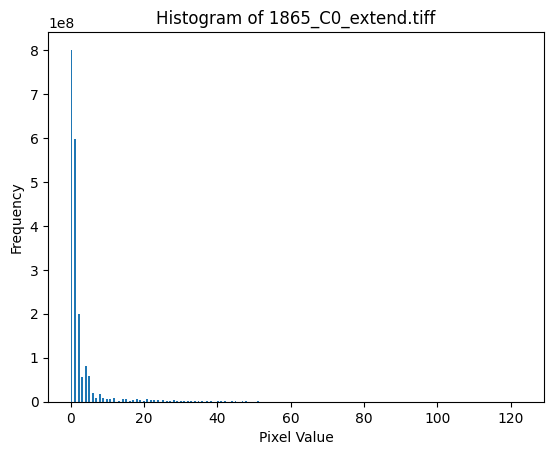

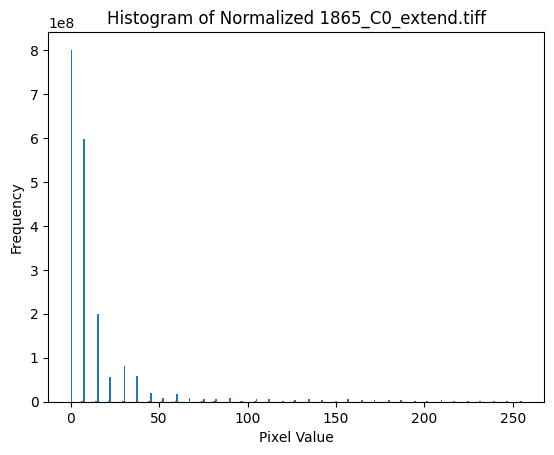

Normalized image saved as /home/steve/Projects/WeaverLab/STIFMaps/temp_outputs/1865/1865_C0_normalized.tif
Processing Collagen image for base name 1865...


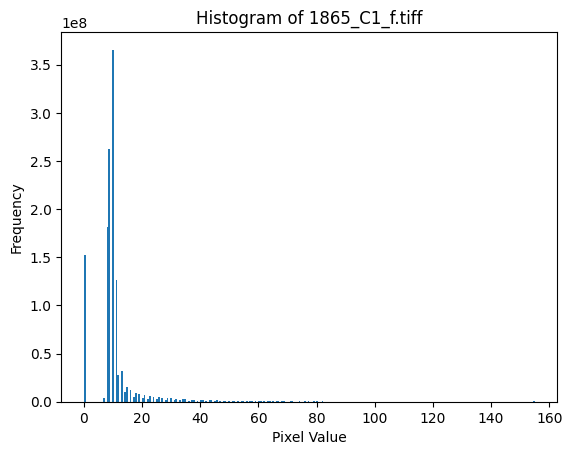

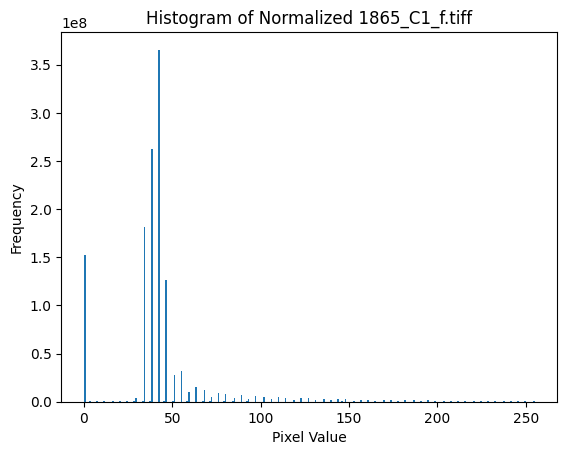

Normalized image saved as /home/steve/Projects/WeaverLab/STIFMaps/temp_outputs/1865/1865_C1_normalized.tif


In [3]:
# Loop through all base names and generate tiles for corresponding images
for base_name in BASE_NAMES:
    # Use the function to get paths for DAPI and Collagen images
    dapi_path, collagen_path = get_dapi_and_collagen_paths(base_name, ORIG_IMAGE_DIR)
    
    # Verify that the files exist before proceeding
    if dapi_path is None:
        print(f"Warning: DAPI file for {base_name} not found.")
        continue
    if collagen_path is None:
        print(f"Warning: Collagen file for {base_name} not found.")
        continue

    # Create output directory for tiles for the current base name
    output_dir = os.path.join(TEMP_OUTPUTS_DIR, base_name)
    os.makedirs(output_dir, exist_ok=True)

    # Generate tiles for DAPI and Collagen images
    print(f"Processing DAPI image for base name {base_name}...")
    gen_tile_images(dapi_path, output_dir, tile_size=TILE_SIZE)
    print(f"Processing Collagen image for base name {base_name}...")
    gen_tile_images(collagen_path, output_dir, tile_size=TILE_SIZE)

In [4]:
# check_image_dimensions("/home/steve/Projects/WeaverLab/STIFMaps/IPMN_images/tiled/27620_C0_full_tile_0_0.tif")
check_image_dimensions(os.path.join(output_dir, "27620_C0_full_tile_0_0.tif"))

Error opening /home/steve/Projects/WeaverLab/STIFMaps/temp_outputs/1865/27620_C0_full_tile_0_0.tif: [Errno 2] No such file or directory: '/home/steve/Projects/WeaverLab/STIFMaps/temp_outputs/1865/27620_C0_full_tile_0_0.tif'
